In [1]:
from datetime import datetime, timedelta
from time import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.options.display.min_rows = 25

# Importing Grades --> "all_scores.csv"

In [5]:
all_scores = pd.read_excel("Grades/Book1.xlsx")

In [6]:
all_scores["Is A"] = all_scores["Final Score"] >= 90

In [7]:
# https://courses.cs.vt.edu/~cs1604/grading.html

letter_grade = []
for grade in all_scores["Final Score"]:
    if grade >= 90:
        letter_grade.append("A")
    elif grade >= 80:
        letter_grade.append("B")
    elif grade >= 70:
        letter_grade.append("C")
    elif grade >= 60:
        letter_grade.append("D")
    else:
        letter_grade.append("F")

all_scores["Letter Grade"] = letter_grade

In [8]:
all_scores["Total Exams"] = all_scores[["Final Exam", "Midterm 1", "Midterm 2"]].sum(
    axis=1
)

In [9]:
all_scores.to_csv('all_scores.csv')

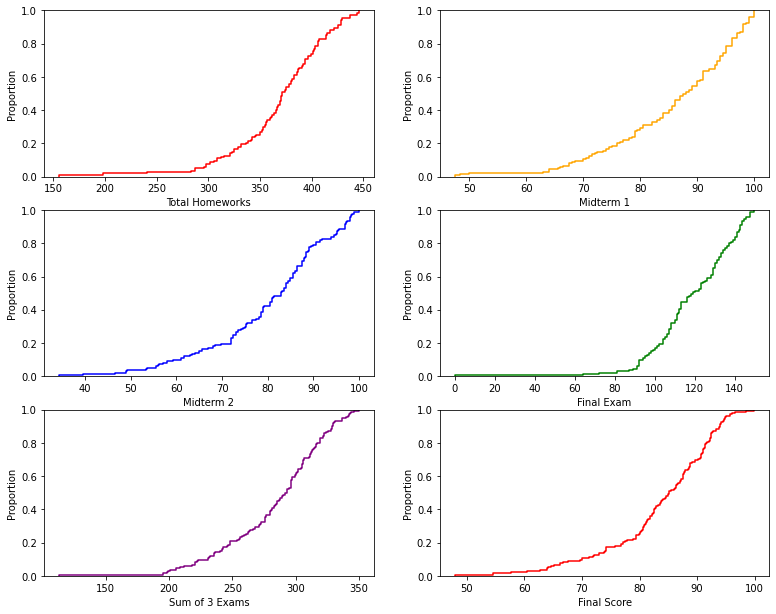

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(13, 10.4))
plt.style.use("default")

sns.ecdfplot(data=all_scores["Total Homeworks"], legend=True, color="red", ax=axs[0, 0])
sns.ecdfplot(data=all_scores["Midterm 1"], legend=True, color="orange", ax=axs[0, 1])
sns.ecdfplot(data=all_scores["Midterm 2"], legend=True, color="blue", ax=axs[1, 0])
sns.ecdfplot(data=all_scores["Final Exam"], legend=True, color="green", ax=axs[1, 1])
sns.ecdfplot(data=all_scores["Total Exams"], legend=True, color="purple", ax=axs[2, 0])
sns.ecdfplot(data=all_scores["Final Score"], legend=True, color="red", ax=axs[2, 1])

# axs[0,1].set_title ('Score out of 100')
axs[2, 0].set_xlabel("Sum of 3 Exams")
fig.savefig("CDF Grades", dpi=400, facecolor="white")

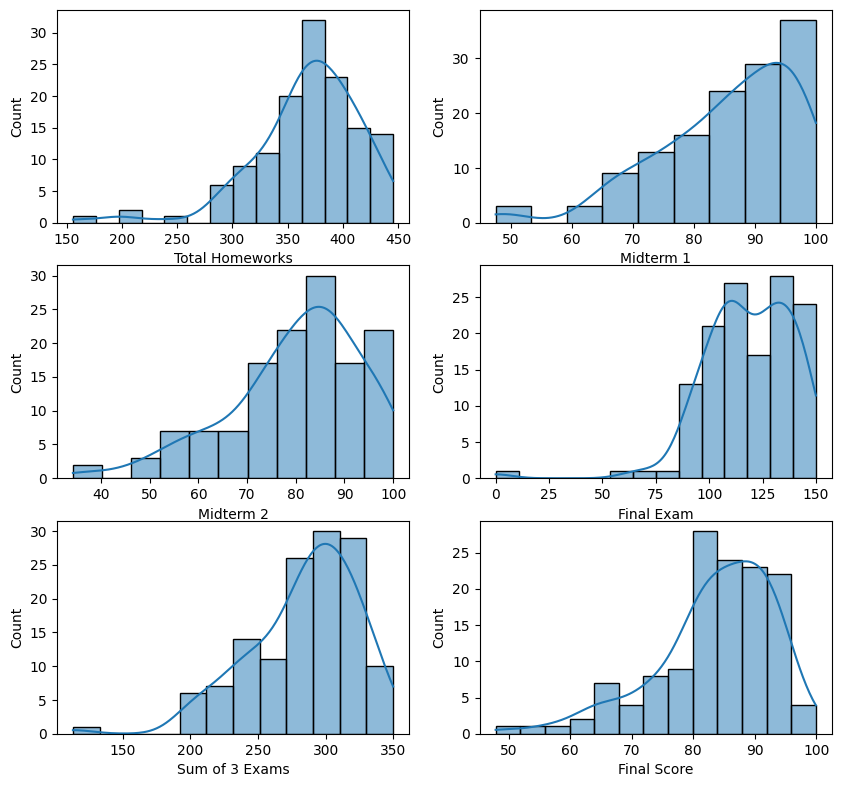

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(10, 9.4))
plt.style.use("default")

sns.histplot(x=all_scores["Total Homeworks"], kde=True, ax=axs[0, 0])
sns.histplot(x=all_scores["Midterm 1"], kde=True, ax=axs[0, 1])
sns.histplot(x=all_scores["Midterm 2"], kde=True, ax=axs[1, 0])
sns.histplot(x=all_scores["Final Exam"], kde=True, ax=axs[1, 1])
sns.histplot(x=all_scores["Total Exams"], kde=True, ax=axs[2, 0])
sns.histplot(x=all_scores["Final Score"], kde=True, ax=axs[2, 1])

axs[2, 0].set_xlabel("Sum of 3 Exams")
fig.savefig("HistPlot Grades", dpi=400, facecolor="white")

# Importing Clusters "Clustered_Sessions.csv"

## Counting Credit Seeking times per student Up to END --> "Clustered_Users.csv"

In [12]:
clusters_df = pd.read_csv("Clustered_Sessions_FCM.csv")
clusters_df.columns

Index(['cluster', 'user_id', 'session_number', 'curr_frameset_name',
       'Percentage_incorrects', 'Percentage_corrects',
       'percent_consecutive_incorrect_interactions',
       'percent_consecutive_correct_interactions', 'n_backs',
       'nth_trial_of_frame', 'time_between_median'],
      dtype='object')

In [13]:
# Adding time to the sessions clustered
time = pd.read_excel("Sessions_1D_old_names.xlsx")
time.columns

Index(['Unnamed: 0', 'user_id', 'session_number', 'curr_frameset_name',
       'activity_name', 'question_id', 'timestamp'],
      dtype='object')

In [14]:
frames_we_want = clusters_df.session_number.unique()
time = time[time['session_number'].isin(frames_we_want)]
time = time.groupby(["session_number"], as_index=False).agg(
    timestamp=("timestamp", "min"),
)
clustered_df_with_time = (
    pd.merge(
        clusters_df, time, left_on="session_number", right_on="session_number", how="inner"
    )
)

In [124]:
spring_21_end = datetime(2021,5,14)
clustered_df_with_time = clustered_df_with_time[clustered_df_with_time['timestamp'] <= spring_21_end]

In [17]:
Fall20 = clustered_df_with_time[clustered_df_with_time['timestamp'].dt.year==2020]

len(Fall20), len(Fall20['user_id'].unique()), len(Fall20['curr_frameset_name'].unique())

(3472, 74, 91)

In [18]:
Spring21 = clustered_df_with_time[clustered_df_with_time['timestamp'].dt.year==2021]
len(Spring21),  len(Spring21['user_id'].unique()),  len(Spring21['curr_frameset_name'].unique())

(5207, 70, 87)

In [19]:
x = len(Fall20[Fall20['cluster']=='Credit Seeking']); y = len(Fall20[Fall20['cluster']=='Normal'])
x, y , x+y

(1036, 2436, 3472)

In [20]:
x = len(Spring21[Spring21['cluster']=='Credit Seeking']); y=  len(Spring21[Spring21['cluster']=='Normal'])
x, y , x+y

(2047, 3160, 5207)

In [84]:
weeks5 = timedelta(weeks=5)



fall_20_up_to_mid1 = datetime(2020,9,28)  # Exactly 5 weeks after the beginning of the semester
Fall20_mid1 = Fall20[Fall20['timestamp'] <= fall_20_up_to_mid1] # There's a problem here in Fall'20, it wasn't store all data starting from 24th August 2020
Fall20_mid1 = Fall20[Fall20['timestamp'] <=  Fall20['timestamp'].min()+weeks5] 


spring_21_up_to_mid1 = datetime(2021,3,4)  # Exactly 5 weeks after the beginning of the semester
Spring21_mid1 = Spring21[Spring21['timestamp'] <= spring_21_up_to_mid1]
Spring21_mid1 = Spring21[Spring21['timestamp'] <= Spring21['timestamp'].min()+weeks5]


midterms_combined = pd.concat([Fall20_mid1, Spring21_mid1])


In [41]:
x = len(Fall20_mid1[Fall20_mid1['cluster']=='Credit Seeking']); y = len(Fall20_mid1[Fall20_mid1['cluster']=='Normal'])
x,y, x/(y+x), y/(y+x) 

(106, 477, 0.18181818181818182, 0.8181818181818182)

In [42]:
x = len(Spring21_mid1[Spring21_mid1['cluster']=='Credit Seeking']); y = len(Spring21_mid1[Spring21_mid1['cluster']=='Normal'])
x,y, x/(y+x), y/(y+x) 

(542, 942, 0.36522911051212936, 0.6347708894878706)

# Clustered_Users

In [24]:
all_scores = pd.read_excel("Grades/Book1.xlsx")
all_scores["Is A"] = all_scores["Final Score"] >= 90

letter_grade = []
for grade in all_scores["Final Score"]:
    if grade >= 90:
        letter_grade.append("A")
    elif grade >= 80:
        letter_grade.append("B")
    elif grade >= 70:
        letter_grade.append("C")
    elif grade >= 60:
        letter_grade.append("D")
    else:
        letter_grade.append("F")

all_scores["Letter Grade"] = letter_grade

In [25]:
len(all_scores)

134

In [26]:
all_scores.columns

Index(['OpenDSA ID', 'Semester', 'Midterm 1', 'Midterm 2', 'Final Exam',
       'Total Homeworks', 'Without', 'Final Points', 'Final Score',
       'Total Exams', 'Is A', 'Letter Grade'],
      dtype='object')

In [85]:
# Important: 

Clustered_Users = midterms_combined.groupby(["user_id", "cluster"], as_index=False).agg(
    Cluster_Count=("cluster", "count"),
    FramesetName_nunique=("curr_frameset_name", "nunique"),
)

In [86]:

# Cond on Cluster Type --> Drop Cluster Type --> Rename Count to new Name to be able to merge

credit_seeking_student_count = (
    Clustered_Users[Clustered_Users["cluster"] == "Credit Seeking"]
    .drop(labels=["cluster"], axis=1)
    .rename(
        columns={
            "Cluster_Count": "# CrSk Sessions",
            "FramesetName_nunique": "# CrSk Framesets",
        }
    )
)

normal_student_count = (
    Clustered_Users[Clustered_Users["cluster"] == "Normal"]
    .drop(labels=["cluster"], axis=1)
    .rename(
        columns={
            "Cluster_Count": "# Nrml Sessions",
            "FramesetName_nunique": "# Nrml Framesets",
        }
    )
)

In [87]:
Clustered_Users = pd.merge(credit_seeking_student_count,normal_student_count,left_on='user_id',right_on='user_id',how='outer')
Clustered_Users = (
    pd.merge(
        Clustered_Users, all_scores, left_on="user_id", right_on="OpenDSA ID", how="inner"
    )
)

Clustered_Users['# CrSk Sessions'] = Clustered_Users['# CrSk Sessions'].fillna(0)
Clustered_Users['# Nrml Sessions'] = Clustered_Users['# Nrml Sessions'].fillna(0)
Clustered_Users['# CrSk Framesets'] = Clustered_Users['# CrSk Framesets'].fillna(0)
Clustered_Users['# Nrml Framesets'] = Clustered_Users['# Nrml Framesets'].fillna(0)


In [88]:
len(Clustered_Users)

129

In [89]:
Clustered_Users["% of CrSk Sessions"] = Clustered_Users["# CrSk Sessions"] / (
    Clustered_Users["# CrSk Sessions"] + Clustered_Users["# Nrml Sessions"]
)

Clustered_Users["% of Nrml Sessions"] = Clustered_Users["# Nrml Sessions"] / (
    Clustered_Users["# CrSk Sessions"] + Clustered_Users["# Nrml Sessions"]
)

Clustered_Users["% of CrSk Framesets"] = Clustered_Users["# CrSk Framesets"] / (
    Clustered_Users["# CrSk Framesets"] + Clustered_Users["# Nrml Framesets"]
)

In [90]:
Clustered_Users["Is CrSk"] = Clustered_Users["% of CrSk Sessions"] >= 0.5
Clustered_Users["Is CrSk2"] = Clustered_Users["% of CrSk Framesets"] >= 0.5

In [80]:
Clustered_Users.columns

Index(['user_id', '# CrSk Sessions', '# CrSk Framesets', '# Nrml Sessions',
       '# Nrml Framesets', 'OpenDSA ID', 'Semester', 'Midterm 1', 'Midterm 2',
       'Final Exam', 'Total Homeworks', 'Without', 'Final Points',
       'Final Score', 'Total Exams', 'Is A', 'Letter Grade',
       '% of CrSk Sessions', '% of Nrml Sessions', '% of CrSk Framesets',
       'Is CrSk', 'Is CrSk2'],
      dtype='object')

In [91]:
len(Clustered_Users[Clustered_Users["Is CrSk"]==True]), len(Clustered_Users[Clustered_Users["Is CrSk"]==False])


(33, 96)

In [100]:
Clustered_Users[Clustered_Users["Is CrSk"]==True]['Midterm 1'].describe()

count     33.000000
mean      80.636364
std       12.427460
min       48.500000
25%       71.500000
50%       80.500000
75%       90.000000
max      100.000000
Name: Midterm 1, dtype: float64

In [101]:
Clustered_Users[Clustered_Users["Is CrSk"]==False]['Midterm 1'].describe()

count     96.000000
mean      87.791667
std        9.903127
min       50.000000
25%       83.000000
50%       90.000000
75%       96.000000
max      100.000000
Name: Midterm 1, dtype: float64

# Graphs

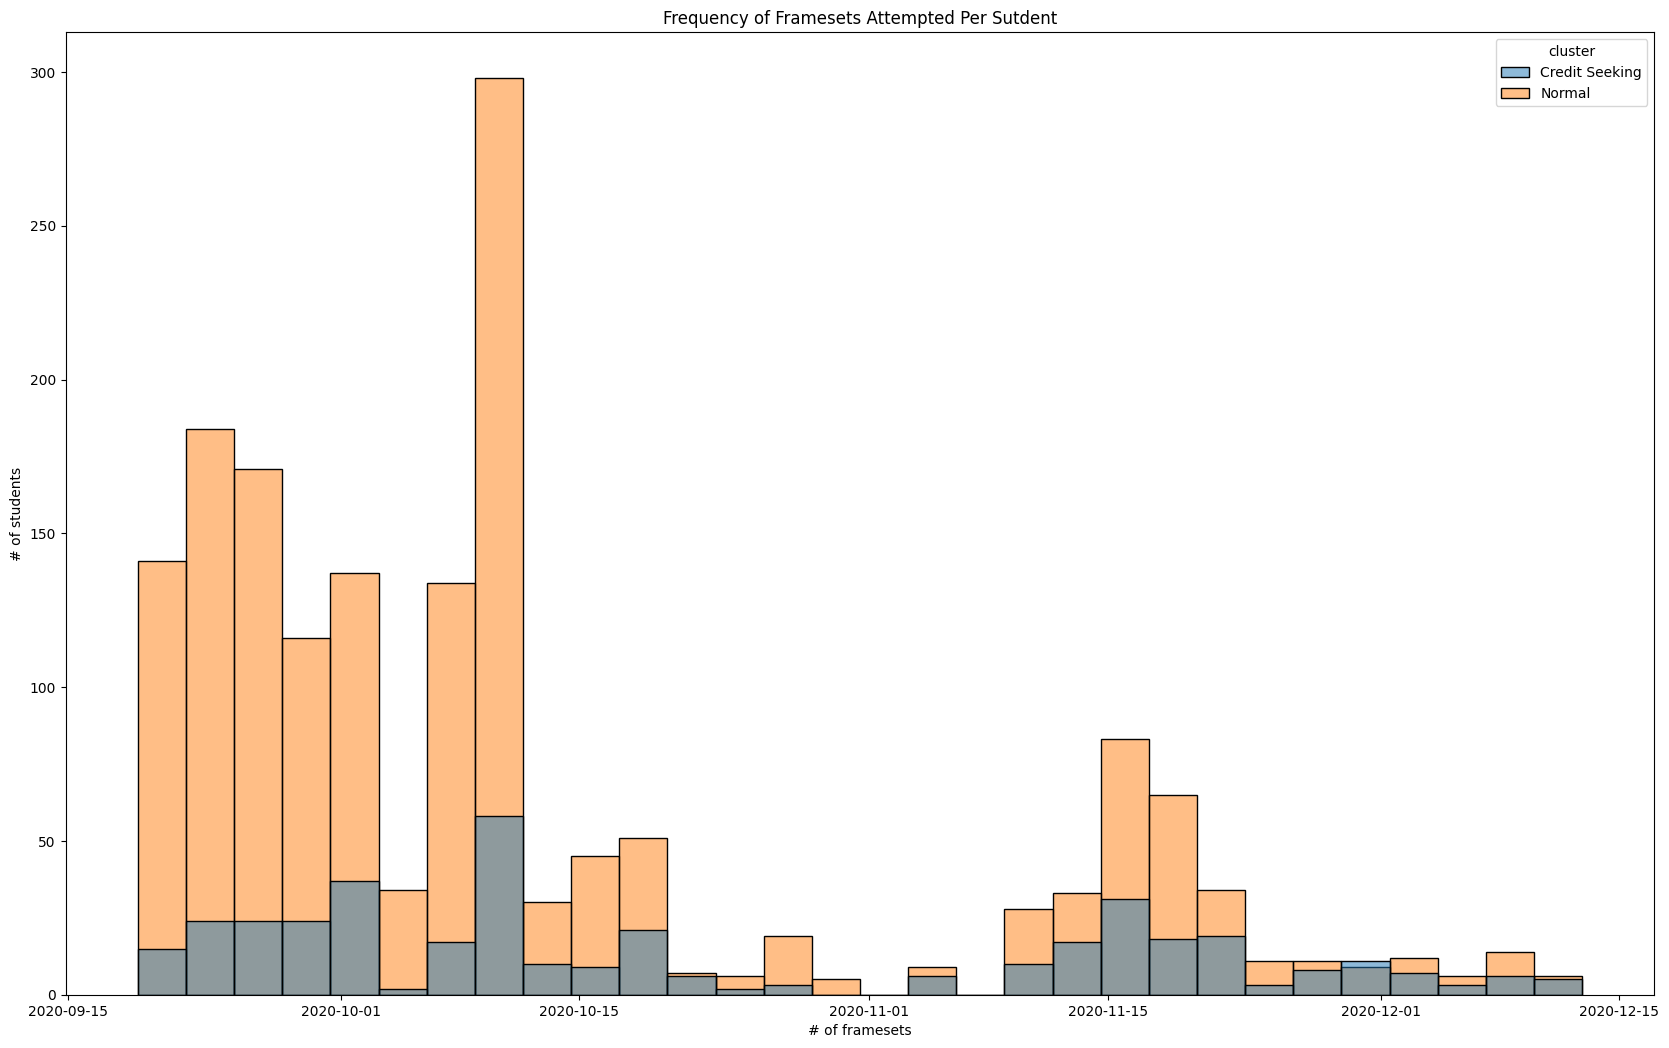

In [172]:
fig, ax = plt.subplots(figsize=(20.5, 12.5))

gfg = sns.histplot(data=Fall20, x='timestamp',bins=30,hue='cluster')#,kind="kde")
gfg.set(
    xlabel="# of framesets",
    ylabel="# of students",
    title="Frequency of Framesets Attempted Per Sutdent",
    # xticks=(range(0, max(n_frames_per_student) + 3, 2)),
)

plt.show()
# The x-axis is # of framesets attempted, The y-axis is the # of students who attempted the same # of framesets
# fig.savefig("Fall20 timestamp", facecolor="white")


# Correlation and Regression - Scatter Plots

R: -0.32967963903990966
P-value 0.00013605876737069167


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


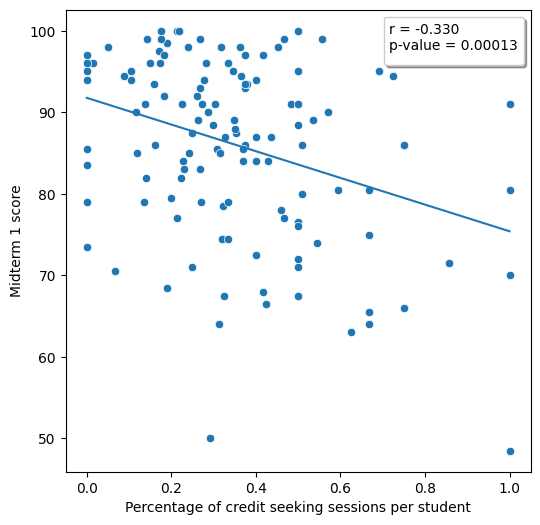

In [99]:
Y =  "Midterm 1"
X ="% of CrSk Sessions"
res = stats.linregress(Clustered_Users[X], Clustered_Users[Y])
rvalue, pvalue = stats.pearsonr(x=Clustered_Users[X], y=Clustered_Users[Y])
print(f"R: {res.rvalue}")
print("P-value", pvalue)
fig, axs = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=Clustered_Users, x=X, y=Y)
gfg = sns.lineplot(x=Clustered_Users[X], y=res.intercept + res.slope * Clustered_Users[X])

gfg.set(
    xlabel="Percentage of credit seeking sessions per student",
    ylabel="Midterm 1 score",
)
plt.legend(loc='upper right',  frameon=True,  shadow=True, title='r = -0.330\np-value = 0.00013')
plt.show()
fig.savefig("Midterm1-r-20-21.pdf", facecolor="white",dpi=500)


R: -0.148609157830435
P-value 0.0928030732692535


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


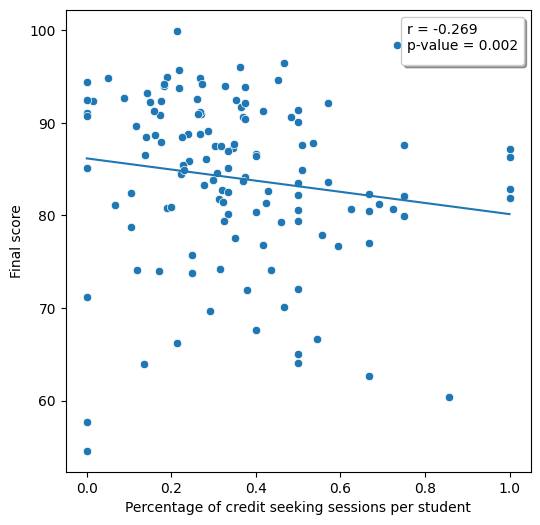

In [96]:
Y = "Final Score" 
X = "% of CrSk Sessions"
res = stats.linregress(Clustered_Users[X], Clustered_Users[Y])
rvalue, pvalue = stats.pearsonr(x=Clustered_Users[X], y=Clustered_Users[Y])
print(f"R: {res.rvalue}")
print("P-value", pvalue)
fig, axs = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=Clustered_Users, x=X, y=Y)
gfg = sns.lineplot(x=Clustered_Users[X], y=res.intercept + res.slope * Clustered_Users[X])

gfg.set(
    xlabel="Percentage of credit seeking sessions per student",
    ylabel="Final score",
)
plt.legend(loc='upper right',  frameon=True,  shadow=True, title='r = -0.269\np-value = 0.002')

plt.show()
fig.savefig("Final-Score-r-20-21.pdf", facecolor="white",dpi=500)


In [266]:
print(
    "% of CrSk Framesets vs. Total Homeworks: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Total Homeworks"]),
)
print(
    "% of CrSk Framesets vs. Final Exam: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Final Exam"]),
)
print(
    "% of CrSk Framesets vs. Total Exams: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Total Exams"]),
)
print(
    "% of CrSk Framesets vs. Final Score: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Final Score"]),
)

print(
    "% of CrSk Framesets vs. Midterm 1: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Midterm 1"]),
)

% of CrSk Framesets vs. Total Homeworks:  (-0.25462022894673836, 0.003336958767934233)
% of CrSk Framesets vs. Final Exam:  (-0.3073907991782101, 0.00035507795014683434)
% of CrSk Framesets vs. Total Exams:  (-0.2796602515187236, 0.0012165103853829674)
% of CrSk Framesets vs. Final Score:  (-0.2442464325274142, 0.004931923224349785)
% of CrSk Framesets vs. Midterm 1:  (-0.19909460811100618, 0.022621005506149414)


In [267]:
print(
    "% of Credit Seeking Vs. Total Homeworks: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Sessions"], y=Clustered_Users["Total Homeworks"]),
)
print(
    "% of Credit Seeking Vs. Final Exam: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Sessions"], y=Clustered_Users["Final Exam"]),
)
print(
    "% of Credit Seeking Vs. Total Exams: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Sessions"], y=Clustered_Users["Total Exams"]),
)
print(
    "% of Credit Seeking Vs. Final Score: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Sessions"], y=Clustered_Users["Final Score"]),
)

% of Credit Seeking Vs. Total Homeworks:  (-0.265600699630478, 0.002168933120331135)
% of Credit Seeking Vs. Final Exam:  (-0.321310166141356, 0.0001825295226554095)
% of Credit Seeking Vs. Total Exams:  (-0.29429801349587814, 0.0006448860566981726)
% of Credit Seeking Vs. Final Score:  (-0.26026804077962834, 0.002679719373717125)


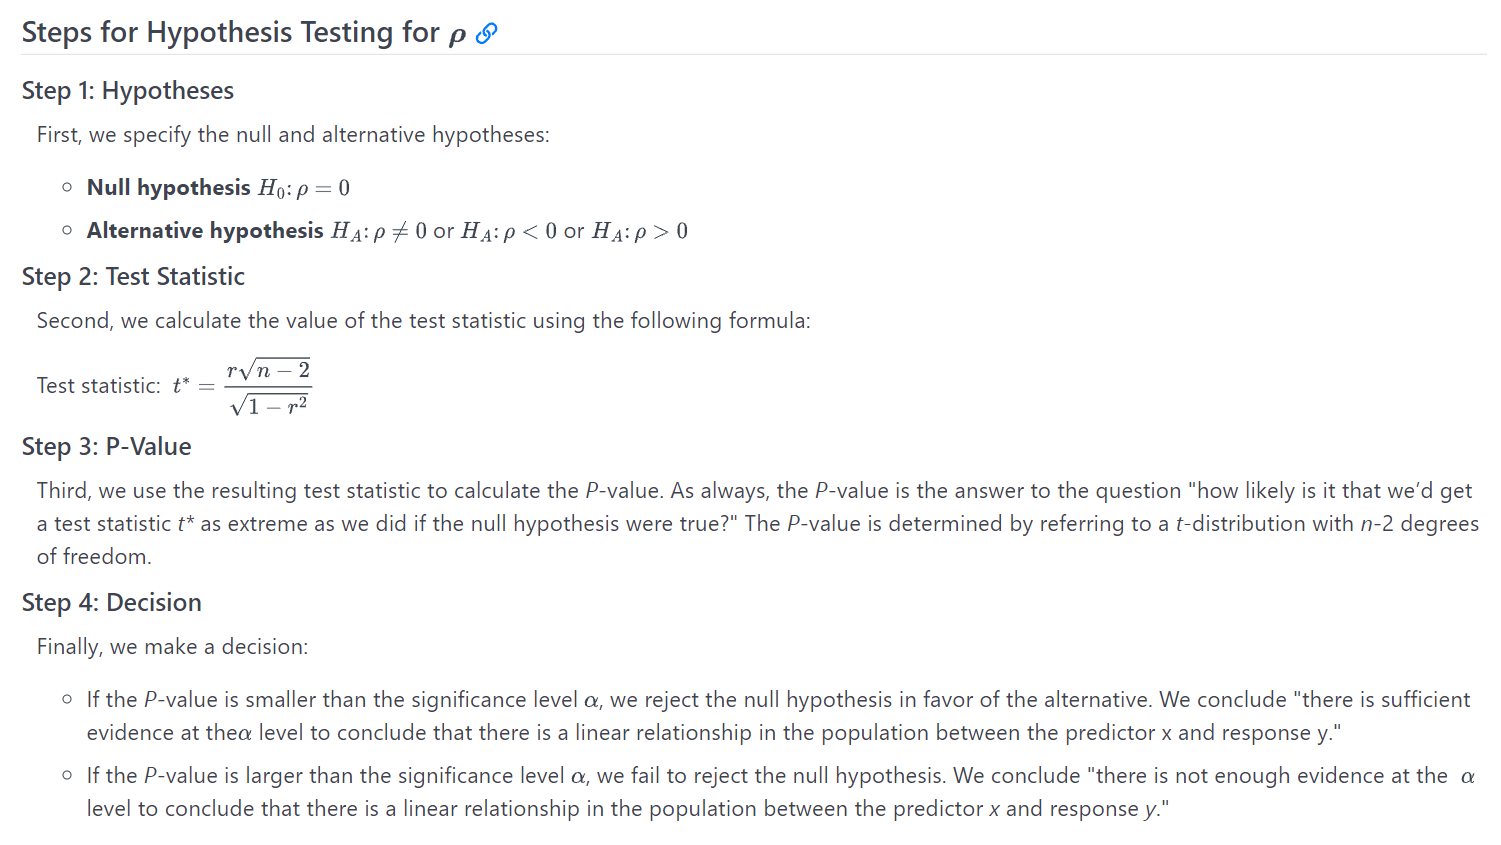

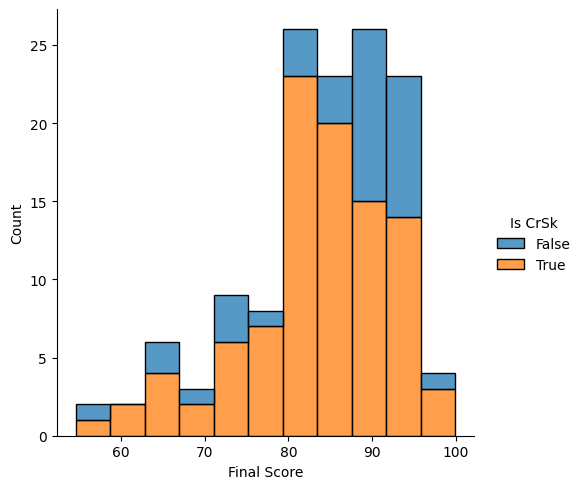

In [255]:
sns.displot(data=Clustered_Users, x="Final Score", hue="Is CrSk", multiple="stack")

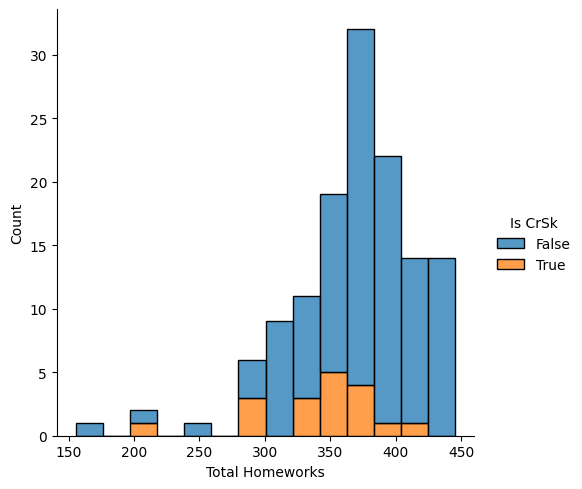

In [272]:
sns.displot(data=Clustered_Users, x="Total Homeworks", hue="Is CrSk", multiple="stack")

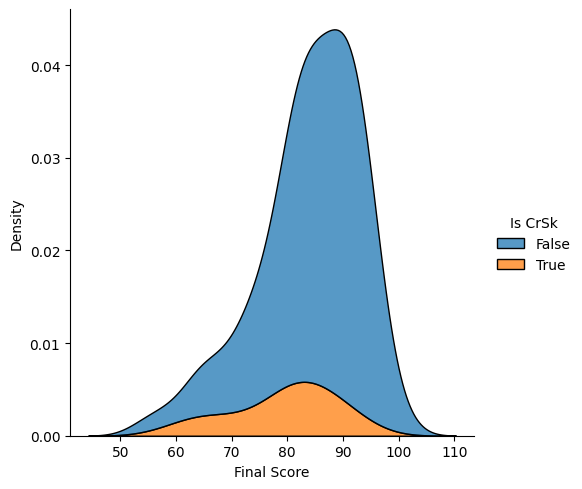

In [270]:
sns.displot(
    data=Clustered_Users, x="Final Score", hue="Is CrSk", multiple="stack", kind="kde"
)

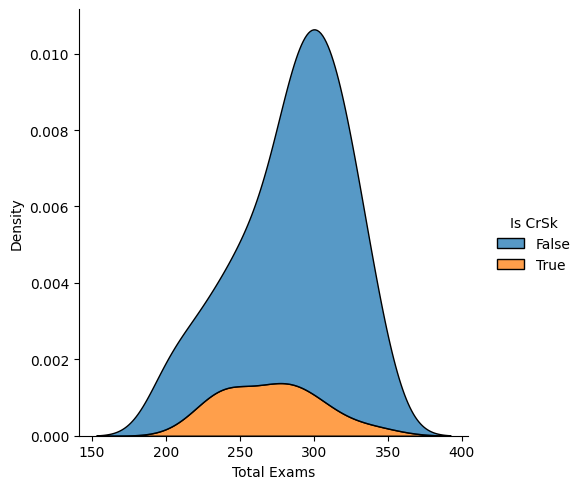

In [273]:
sns.displot(
    data=Clustered_Users, x="Total Exams", hue="Is CrSk", multiple="stack", kind="kde"
)

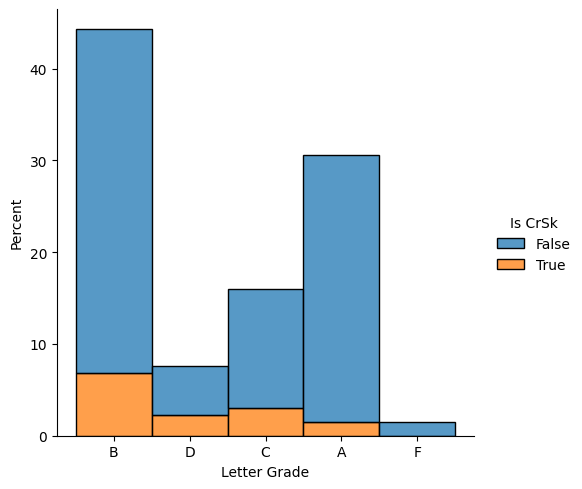

In [274]:
sns.displot(
    data=Clustered_Users, x="Letter Grade", stat="percent", hue="Is CrSk", multiple="stack"
)

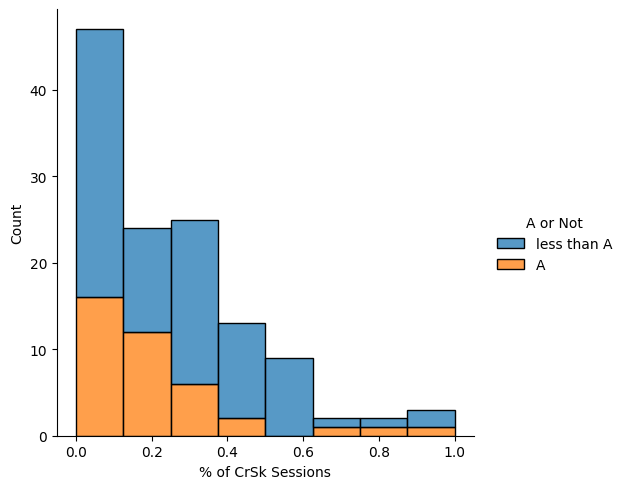

In [130]:
sns.displot(data=Clustered_Users, x="% of CrSk Sessions", hue="A or Not", multiple="stack")

# t-test for comparing Scores between Students

In [335]:
temp = Clustered_Users[Clustered_Users["Is CrSk"] == True]["Final Score"]
print("Credit Seeking: ", temp.mean(), temp.std(), len(temp))

print()
temp = Clustered_Users[Clustered_Users["Is CrSk"] == False]["Final Score"]
print("Normal: ", temp.mean(), temp.std(), len(temp))

Credit Seeking:  79.64882352941177 9.539189586537969 34

Normal:  85.30887755102042 8.536534326923814 98


In [330]:
temp = Clustered_Users[Clustered_Users["Is CrSk"] == True]["Total Homeworks"]
print("Credit Seeking: ", temp.mean(), temp.std(), len(temp))

print()
temp = Clustered_Users[Clustered_Users["Is CrSk"] == False]["Total Homeworks"]
print("Normal: ", temp.mean(), temp.std(), len(temp))

Credit Seeking:  343.90735294117644 56.818980413282596 34

Normal:  376.1775510204082 43.27476117514008 98


In [334]:
temp = Clustered_Users[Clustered_Users["Is CrSk"] == True]["Total Exams"]
print("Credit Seeking: ", temp.mean(), temp.std(), len(temp))

print()
temp = Clustered_Users[Clustered_Users["Is CrSk"] == False]["Total Exams"]
print("Normal: ", temp.mean(), temp.std(), len(temp))

Credit Seeking:  267.7279411764706 39.63781900701398 34

Normal:  291.18367346938777 34.4701527662314 98


In [329]:
temp = Clustered_Users[Clustered_Users["Is CrSk"] == True][
    ["Final Exam", "Midterm 1", "Midterm 2"]
].sum(axis=1)
print("Credit Seeking: ", temp.mean(), temp.std(), len(temp), temp.median())

temp = Clustered_Users[Clustered_Users["Is CrSk"] == False][
    ["Final Exam", "Midterm 1", "Midterm 2"]
].sum(axis=1)
print("Normal: ", temp.mean(), temp.std(), len(temp), temp.median())

Credit Seeking:  267.7279411764706 39.63781900701398 34 274.0
Normal:  291.18367346938777 34.4701527662314 98 296.5


In [92]:
temp = Clustered_Users[Clustered_Users["Is CrSk"] == True]["Total Homeworks"]
temp.mean(), temp.median(), len(temp), temp.std()

(363.6801204819277, 367.75, 83, 48.698084263766646)

In [47]:
temp = Clustered_Users[Clustered_Users["Is CrSk"] == False]["Total Homeworks"]
temp.mean(), temp.median(), len(temp), temp.std()

(376.2494444444444, 378.0, 90, 44.49767541867123)

Small effect (cannot be discerned by the naked eye) = 0.2


Medium Effect = 0.5

Large Effect (can be seen by the naked eye) = 0.8


Cohen's d is the appropriate effect size measure if two groups have similar standard deviations and are of the same size. 

Glass's delta, which uses only the standard deviation of the control group, is an alternative measure if each group has a different standard deviation. 

Hedges' g, which provides a measure of effect size weighted according to the relative size of each sample, is an alternative where there are different sample sizes. 
(This is important! If you've got different sample sizes then you should use Hedges' g.)

In [ ]:
Clustered_Users.to_csv("Clustered_Users.csv")